In [1]:
from new_loader import TorchTensorFolderDataset
from torch.utils.data import DataLoader
import os
import torch
torch.manual_seed(0)
from torch.optim import AdamW
def get_loaders():
    train_path = os.path.join(os.getcwd(),"data\\preprocessed\\standard\\mel\\train")
    val_path = os.path.join(os.getcwd(),"data\\preprocessed\\standard\\mel\\validation")
    test_path = os.path.join(os.getcwd(),"data\\preprocessed\\standard\\mel\\test")
    
    train_dataset = TorchTensorFolderDataset(train_path)
    val_dataset = TorchTensorFolderDataset(val_path)
    test_dataset = TorchTensorFolderDataset(test_path)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size = 16)
    val_loader = DataLoader(val_dataset, shuffle=False, batch_size = 256)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size = 256)

    return {"train":train_loader, "val":val_loader, "test":test_loader}

def get_denoised_loaders():
    
    train_path = os.path.join(os.getcwd(),"data\\preprocessed\\denoised\\mel\\train")
    val_path = os.path.join(os.getcwd(),"data\\preprocessed\\denoised\\mel\\validation")
    test_path = os.path.join(os.getcwd(),"data\\preprocessed\\denoised\\mel\\test")
    
    train_dataset = TorchTensorFolderDataset(train_path)
    val_dataset = TorchTensorFolderDataset(val_path)
    test_dataset = TorchTensorFolderDataset(test_path)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size = 16)
    val_loader = DataLoader(val_dataset, shuffle=False, batch_size = 256)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size = 256)

    return {"train":train_loader, "val":val_loader, "test":test_loader}

In [2]:
from EfficientNet_implementation import get_pretrained_model,train_model
loaders = get_loaders()
train_loader, val_loader = loaders["train"], loaders["val"]

In [3]:
standard_model = get_pretrained_model()
optimizer = AdamW(standard_model.parameters(),0.001,weight_decay=0.001)
train_model(standard_model,optimizer,train_loader,val_loader,verbose=True)

Epoch [1/20]
Train Loss: 0.6391, Train Acc: 82.44%
Val Loss:   0.2515, Val Acc:   92.98%



Epoch [2/20]
Train Loss: 0.2431, Train Acc: 93.06%
Val Loss:   0.2036, Val Acc:   94.16%



Epoch [3/20]
Train Loss: 0.1867, Train Acc: 94.62%
Val Loss:   0.2015, Val Acc:   94.41%



Epoch [4/20]
Train Loss: 0.1552, Train Acc: 95.50%
Val Loss:   0.2451, Val Acc:   93.45%



Epoch [5/20]
Train Loss: 0.1367, Train Acc: 95.96%
Val Loss:   0.2074, Val Acc:   94.34%



Epoch [6/20]
Train Loss: 0.1221, Train Acc: 96.46%
Val Loss:   0.1807, Val Acc:   94.88%



Epoch [7/20]
Train Loss: 0.1075, Train Acc: 96.87%
Val Loss:   0.1816, Val Acc:   94.90%



Epoch [8/20]
Train Loss: 0.1019, Train Acc: 97.02%
Val Loss:   0.1996, Val Acc:   94.98%



Epoch [9/20]
Train Loss: 0.0991, Train Acc: 97.10%
Val Loss:   0.1938, Val Acc:   95.04%



Epoch [10/20]
Train Loss: 0.0896, Train Acc: 97.37%
Val Loss:   0.2142, Val Acc:   94.97%



Epoch [11/20]
Train Loss: 0.0855, Train Acc: 97.50%
Val Loss:   0.1912, Val Acc:   95.19%



Epoch [12/20]
Train Loss: 0.0803, Train Acc: 97.60%
Val Loss:   0.2143, Val Acc:   94.94%



Epoch [13/20]
Train Loss: 0.0747, Train Acc: 97.86%
Val Loss:   0.2005, Val Acc:   95.07%



Epoch [14/20]
Train Loss: 0.0743, Train Acc: 97.81%
Val Loss:   0.1691, Val Acc:   95.47%



Epoch [15/20]
Train Loss: 0.0696, Train Acc: 97.94%
Val Loss:   0.1886, Val Acc:   95.22%



Epoch [16/20]
Train Loss: 0.0659, Train Acc: 98.00%
Val Loss:   0.2086, Val Acc:   95.09%



Epoch [17/20]
Train Loss: 0.0624, Train Acc: 98.10%
Val Loss:   0.1978, Val Acc:   95.03%

Patience trigger. End of learning.


In [4]:
torch.save(standard_model.state_dict(), 'models/standard_eff_net.pth')

Test accuracy 95.81565471836137


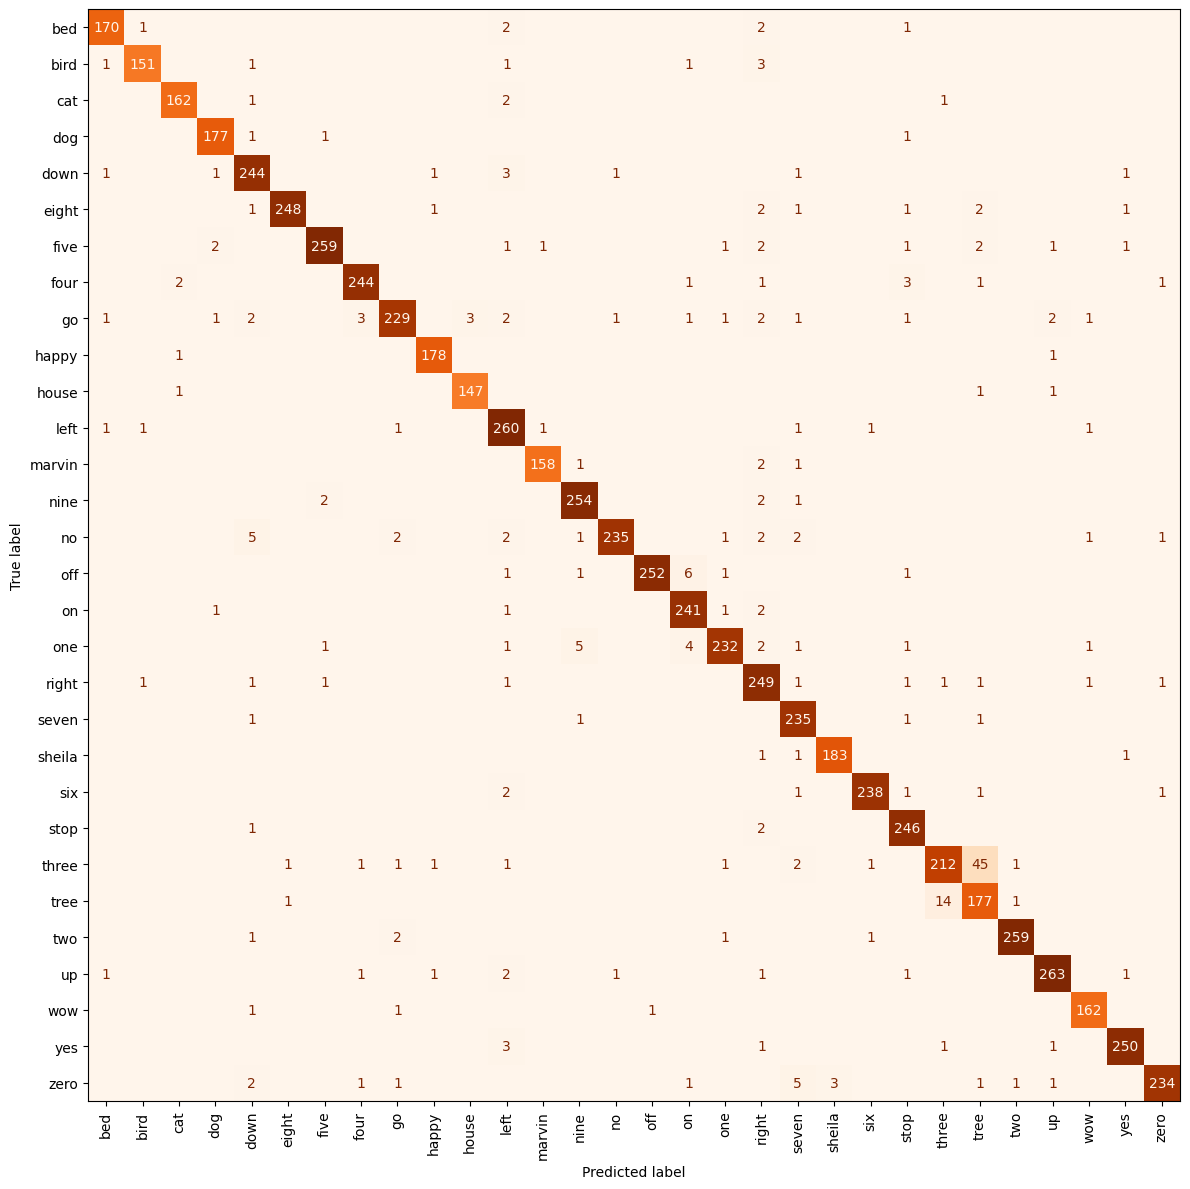

In [5]:
from tester import get_confusion_matrix
from EfficientNet_implementation import test_model
test_loss, test_acc =test_model(standard_model,loaders["test"])
print("Test accuracy", test_acc)
get_confusion_matrix(standard_model,loaders["test"])

In [6]:
loaders = get_denoised_loaders()
train_loader, val_loader = loaders["train"], loaders["val"]
denoised_model = get_pretrained_model()
optimizer = AdamW(denoised_model.parameters(),0.001,weight_decay=0.001)
train_model(denoised_model,optimizer,train_loader,val_loader,verbose=True)

Epoch [1/20]
Train Loss: 0.6055, Train Acc: 83.46%
Val Loss:   0.2946, Val Acc:   91.28%



Epoch [2/20]
Train Loss: 0.2441, Train Acc: 92.91%
Val Loss:   0.2326, Val Acc:   93.45%



Epoch [3/20]
Train Loss: 0.1883, Train Acc: 94.60%
Val Loss:   0.2063, Val Acc:   94.03%



Epoch [4/20]
Train Loss: 0.1582, Train Acc: 95.36%
Val Loss:   0.1890, Val Acc:   94.59%



Epoch [5/20]
Train Loss: 0.1392, Train Acc: 95.97%
Val Loss:   0.2084, Val Acc:   94.17%



Epoch [6/20]
Train Loss: 0.1265, Train Acc: 96.33%
Val Loss:   0.1969, Val Acc:   94.69%



Epoch [7/20]
Train Loss: 0.1145, Train Acc: 96.69%
Val Loss:   0.1780, Val Acc:   94.70%



Epoch [8/20]
Train Loss: 0.1037, Train Acc: 96.97%
Val Loss:   0.1880, Val Acc:   95.00%



Epoch [9/20]
Train Loss: 0.0993, Train Acc: 97.09%
Val Loss:   0.1981, Val Acc:   94.67%



Epoch [10/20]
Train Loss: 0.0908, Train Acc: 97.29%
Val Loss:   0.1751, Val Acc:   95.25%



Epoch [11/20]
Train Loss: 0.0865, Train Acc: 97.49%
Val Loss:   0.1730, Val Acc:   95.23%



Epoch [12/20]
Train Loss: 0.0811, Train Acc: 97.57%
Val Loss:   0.1883, Val Acc:   94.98%



Epoch [13/20]
Train Loss: 0.0763, Train Acc: 97.70%
Val Loss:   0.1950, Val Acc:   95.01%

Patience trigger. End of learning.


In [7]:
torch.save(denoised_model.state_dict(), 'models/denoised_eff_net.pth')

Test accuracy 95.96196049743965


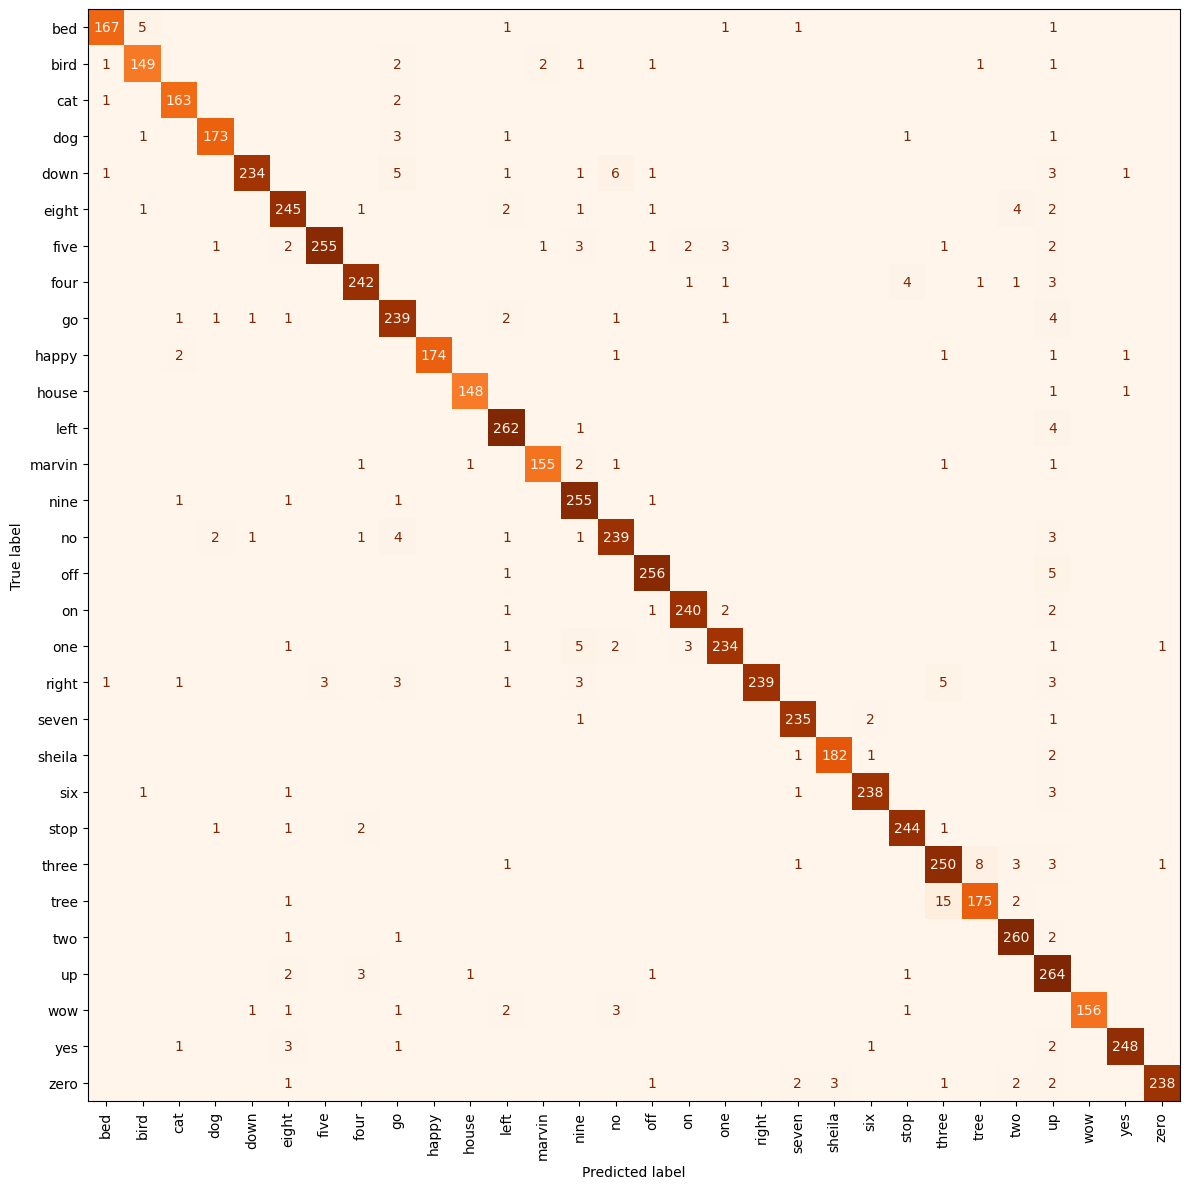

In [8]:
test_loss, test_acc =test_model(denoised_model,loaders["test"])
print("Test accuracy", test_acc)
get_confusion_matrix(denoised_model,loaders["test"])